In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd

# Load dataset 
df = pd.read_csv('ecg.csv\ecg.csv', header=None)

# Display basic info
print(df.shape)  # Should print (4998, 141)
print(df.head())  # Check the first few rows

(4998, 141)
        0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   

        7         8         9    ...       131       132       133       134  \
0 -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958  0.578621   
1 -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490  0.724046   
2 -1.490659 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377 -0.021919   
3 -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345  0.842069   
4 -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025  1.371682   

        135       136       137       138       139  140

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Meghana K\AppData\Local\Temp\ipykernel_14292\200901947.py:4: SyntaxWarning: invalid escape sequence '\e'
  df = pd.read_csv('ecg.csv\ecg.csv', header=None)


In [4]:
print(df.describe)

<bound method NDFrame.describe of            0         1         2         3         4         5         6    \
0    -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1    -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2    -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3     0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4     0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   
...        ...       ...       ...       ...       ...       ...       ...   
4993  0.608558 -0.335651 -0.990948 -1.784153 -2.626145 -2.957065 -2.931897   
4994 -2.060402 -2.860116 -3.405074 -3.748719 -3.513561 -3.006545 -2.234850   
4995 -1.122969 -2.252925 -2.867628 -3.358605 -3.167849 -2.638360 -1.664162   
4996 -0.547705 -1.889545 -2.839779 -3.457912 -3.929149 -3.966026 -3.492560   
4997 -1.351779 -2.209006 -2.520225 -3.061475 -3.065141 -3.030739 -2.622720   

           7         8       

In [5]:
import numpy as np

# Extract features (ECG readings) and labels
X = df.iloc[:, :140].values  # Features (ECG signals)
y = df.iloc[:, 140].values   # Labels (0: Normal, 1: Abnormal)

# Check shapes
print(X.shape)  # (4998, 140)
print(y.shape)  # (4998,)


(4998, 140)
(4998,)


In [6]:
#Check the Data Range:
print("Min:", X.min(), "Max:", X.max())


Min: -7.0903741 Max: 7.4021031


## USE EITHER MIN-MAX SCALING OR STANDARDIZATION

In [7]:
# Normalize the ECG data
# Min-Max Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

print("Normalizing using Min-Max Scaling")

Normalizing using Min-Max Scaling


In [8]:
# Standardization (Zero mean, unit variance)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Normalizing using Standardization")


Normalizing using Standardization


In [9]:
# Reshape data to fit ConvLSTM input format
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Check new shape
print(X_reshaped.shape)  # (4998, 140, 1)

# Regression target: Predict the next ECG value (shifted label)
y_regression = df.iloc[:, 139].values  # Use the last ECG value in the sequence as the next value prediction

# Classification target: Normal vs Abnormal
y_classification = df.iloc[:, 140].values  # Binary labels (0 or 1)

# Check shapes
print(y_regression.shape)  # (4998,)
print(y_classification.shape)  # (4998,)


(4998, 140, 1)
(4998,)
(4998,)


### Checking Class Distribution (Bias)

In [10]:
import numpy as np
unique, counts = np.unique(y_classification, return_counts=True)
print(dict(zip(unique, counts)))


{0: 2079, 1: 2919}


## Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split into training and testing sets
X_train, X_test, y_train_reg, y_test_reg, y_train_class, y_test_class = train_test_split(
    X_reshaped, y_regression, y_classification, test_size=0.2, random_state=42
)

# Reshape regression targets to (n_samples, 1) for compatibility with the model
y_train_reg = y_train_reg.reshape(-1, 1)  # -1 infers the number of samples
y_test_reg = y_test_reg.reshape(-1, 1)

# Check new shapes
print("X_train shape:", X_train.shape)  # (3998, 140, 1)
print("X_test shape:", X_test.shape)   # Should be (1000, 140, 1)
print("y_train_reg shape:", y_train_reg.shape)  # (3998, 1)
print("y_test_reg shape:", y_test_reg.shape)    # (1000, 1)
print("y_train_class shape:", y_train_class.shape)  # (3998,)
print("y_test_class shape:", y_test_class.shape)    # (1000,)

X_train shape: (3998, 140, 1)
X_test shape: (1000, 140, 1)
y_train_reg shape: (3998, 1)
y_test_reg shape: (1000, 1)
y_train_class shape: (3998,)
y_test_class shape: (1000,)


## Regression Model

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Bidirectional, Dropout, BatchNormalization, Dense

def build_regression_model(input_shape):
    """
    Builds a 1D ConvLSTM model for ECG value prediction.
    
    Args:
        input_shape (tuple): Shape of input data (timesteps, features)
    
    Returns:
        model: Compiled Keras model for regression
    """
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=64, kernel_size=5, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = Dropout(0.3)(x)
    x = Bidirectional(LSTM(32, return_sequences=False))(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1, activation='linear')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])
    return model

# Usage
input_shape = (140, 1)
regression_model = build_regression_model(input_shape)
regression_model.summary()

# Training example
# regression_model.fit(X_train, y_train_reg, epochs=50, batch_size=32, validation_split=0.2)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 140, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 140, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 140, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 140, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 140, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,017 (429.75 KB)

 Trainable params: 109,889 (429.25 KB)

 Non-trainable params: 128 (512.00 B)

## Classification Model

In [13]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, GlobalAveragePooling1D

def build_classification_model(input_shape, class_counts):
    """
    Builds a 1D CNN model for ECG anomaly classification.
    
    Args:
        input_shape (tuple): Shape of input data (timesteps, features)
        class_counts (dict): Class distribution {0: count_class_0, 1: count_class_1}
    
    Returns:
        model: Compiled Keras model for classification
    """
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(inputs)
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = GlobalAveragePooling1D()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    
    # Initial bias based on class imbalance
    total_samples = class_counts[0] + class_counts[1]
    p1 = class_counts[1] / total_samples  # Positive class (1)
    p0 = class_counts[0] / total_samples  # Negative class (0)
    initial_bias = np.log(p1 / p0)
    
    outputs = Dense(1, activation='sigmoid',
                    bias_initializer=tf.keras.initializers.Constant(initial_bias))(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Usage
input_shape = (140, 1)
class_counts = {0: 2079, 1: 2919}
classification_model = build_classification_model(input_shape, class_counts)
classification_model.summary()

# Training example
# classification_model.fit(X_train, y_train_class, epochs=50, batch_size=32, 
#                         validation_split=0.2, class_weight=class_weights)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 140, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 140, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 140, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 140, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,409 (161.75 KB)

 Trainable params: 41,409 (161.75 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights for the training set
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_class), y=y_train_class)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print("Class weights:", class_weight_dict)


Class weights: {0: 1.197005988023952, 1: 0.8586769759450171}


In [16]:
# Train the regression model
history1 = regression_model.fit(X_train, y_train_reg, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0669 - mae: 0.1757 - val_loss: 0.0060 - val_mae: 0.0499
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0677 - mae: 0.1817 - val_loss: 0.0118 - val_mae: 0.0726
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0633 - mae: 0.1700 - val_loss: 0.0047 - val_mae: 0.0467
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - loss: 0.0649 - mae: 0.1764 - val_loss: 0.0056 - val_mae: 0.0586
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - loss: 0.0678 - mae: 0.1772 - val_loss: 0.0141 - val_mae: 0.0835
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - loss: 0.0659 - mae: 0.1812 - val_loss: 0.0174 - val_mae: 0.0915
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0656 - mae: 0.1804 - val_loss: 0.0074 - val_mae: 0.0565
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0657 - mae: 0.1760 - val_loss: 0.0034 - val_mae: 0.0463
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1

In [17]:
# Train the classification model (this looks correct)
history2 = classification_model.fit(X_train, y_train_class, epochs=50, batch_size=32, 
                                    validation_split=0.2, class_weight=class_weight_dict)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6462 - loss: 0.6323 - val_accuracy: 0.8737 - val_loss: 0.4532
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8392 - loss: 0.4764 - val_accuracy: 0.8800 - val_loss: 0.3771
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8791 - loss: 0.3560 - val_accuracy: 0.9075 - val_loss: 0.2610
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8939 - loss: 0.2835 - val_accuracy: 0.8763 - val_loss: 0.3112
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8953 - loss: 0.2645 - val_accuracy: 0.9100 - val_loss: 0.2371
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9073 - loss: 0.2353 - val_accuracy: 0.9275 - val_loss: 0.1621
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9143 - loss: 0.2091 - val_accuracy: 0.9312 - val_loss: 0.1479
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9282 - loss: 0.1588 - val_accuracy: 0

In [18]:
# Get Model Predictions
# Get predictions

# Get predictions from the regression model
y_pred_reg = regression_model.predict(X_test)

# Get predictions from the classification model
y_pred_class_proba = classification_model.predict(X_test)

# Convert classification probabilities to binary labels (0 or 1)
y_pred_class = (y_pred_class_proba > 0.5).astype(int)

# Optional: Print or inspect predictions
print("Regression Predictions (ECG values):", y_pred_reg[:5])
print("Classification Probabilities:", y_pred_class_proba[:5])
print("Binary Classification Labels:", y_pred_class[:5])

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Regression Predictions (ECG values): [[ 0.17717761]
 [-1.8467364 ]
 [ 0.03498814]
 [ 1.567528  ]
 [ 0.15339011]]
Classification Probabilities: [[0.9121426 ]
 [0.998489  ]
 [0.9983734 ]
 [0.01839016]
 [0.24249826]]
Binary Classification Labels: [[1]
 [1]
 [1]
 [0]
 [0]]


In [17]:
# Evaluate the regression model
reg_loss, reg_mae = regression_model.evaluate(X_test, y_test_reg, verbose=0)

# Evaluate the classification model
class_loss, class_accuracy = classification_model.evaluate(X_test, y_test_class, verbose=0)

# Print evaluation metrics
print(f"Regression Loss (MSE): {reg_loss:.4f}")
print(f"Regression MAE: {reg_mae:.4f}")
print(f"Classification Loss (Binary Crossentropy): {class_loss:.4f}")
print(f"Classification Accuracy: {class_accuracy:.4f}")

# Compute corrected classification accuracy using scikit-learn
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Corrected Classification Accuracy: {classification_accuracy:.4f}")

NameError: name 'regression_model' is not defined

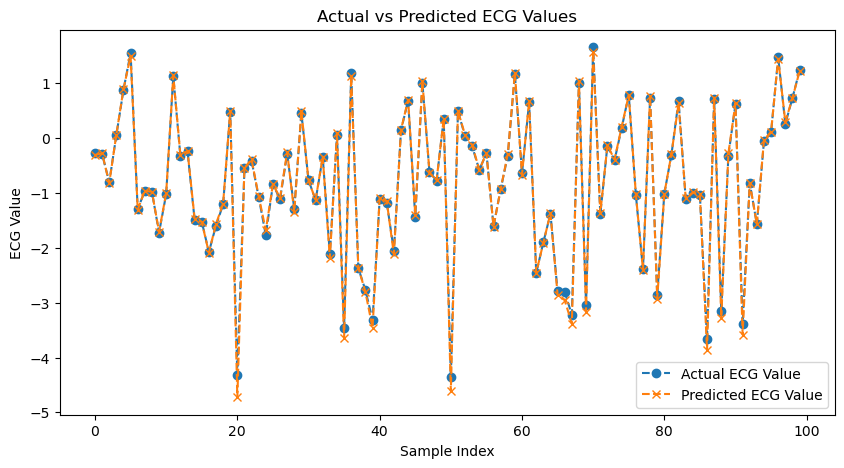

In [20]:
# Plot Regression Results (Actual vs. Predicted ECG)

import matplotlib.pyplot as plt
import numpy as np

# Select random samples for visualization
num_samples = 100
indices = np.random.choice(len(y_test_reg), num_samples, replace=False)

plt.figure(figsize=(10, 5))
plt.plot(y_test_reg[indices], label="Actual ECG Value", linestyle='dashed', marker='o')
plt.plot(y_pred_reg[indices], label="Predicted ECG Value", linestyle='dashed', marker='x')

plt.xlabel("Sample Index")
plt.ylabel("ECG Value")
plt.title("Actual vs Predicted ECG Values")
plt.legend()
plt.show()


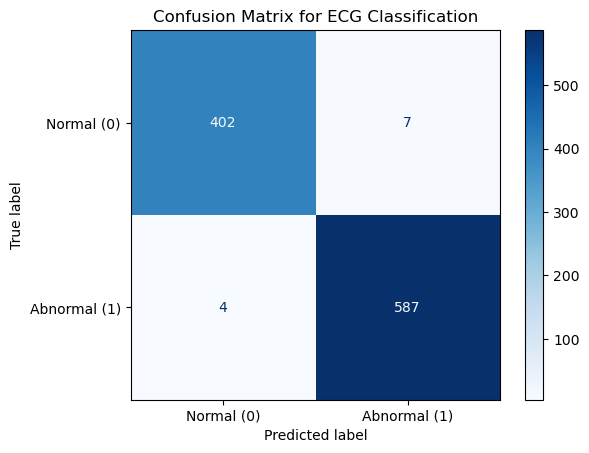

In [21]:
# Plot Classification Results (Confusion Matrix)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal (0)", "Abnormal (1)"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for ECG Classification")
plt.show()


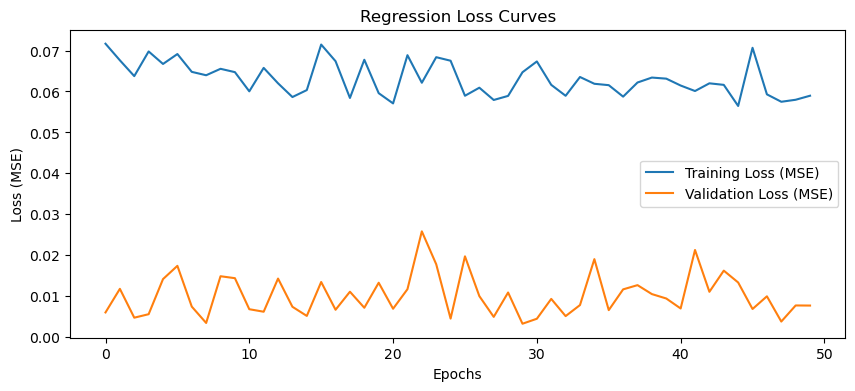

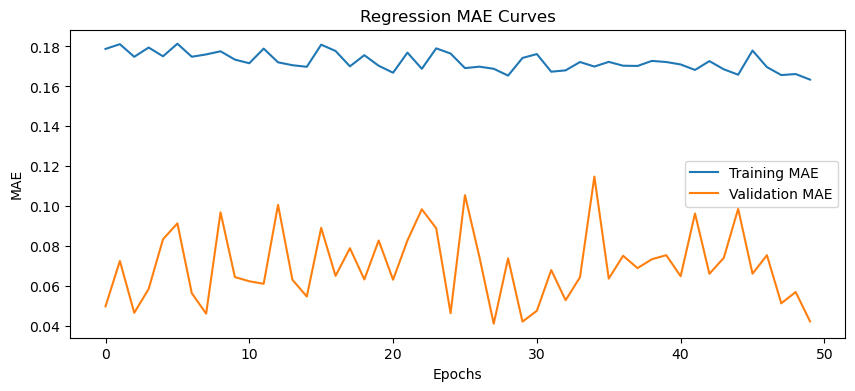

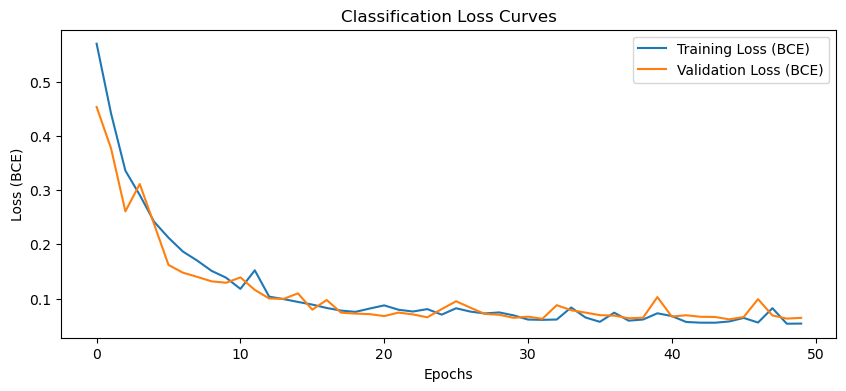

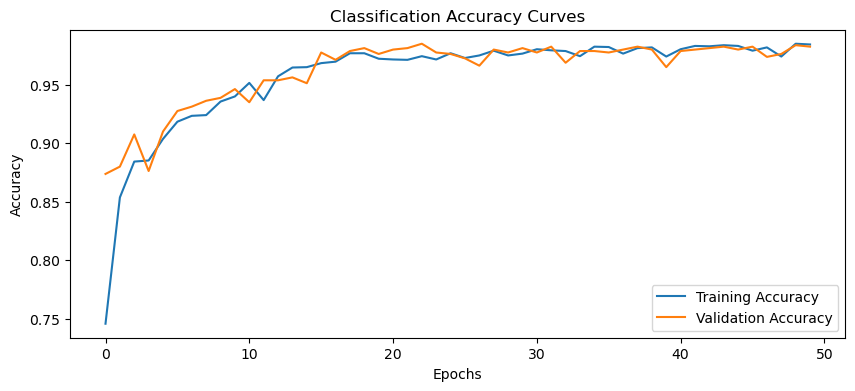

In [22]:
import matplotlib.pyplot as plt

# Plot Regression Loss (MSE) Curves
plt.figure(figsize=(10, 4))
plt.plot(history1.history['loss'], label="Training Loss (MSE)")
plt.plot(history1.history['val_loss'], label="Validation Loss (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Regression Loss Curves")
plt.legend()
plt.show()

# Plot Regression MAE Curves
plt.figure(figsize=(10, 4))
plt.plot(history1.history['mae'], label="Training MAE")
plt.plot(history1.history['val_mae'], label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title("Regression MAE Curves")
plt.legend()
plt.show()

# Plot Classification Loss (Binary Crossentropy) Curves
plt.figure(figsize=(10, 4))
plt.plot(history2.history['loss'], label="Training Loss (BCE)")
plt.plot(history2.history['val_loss'], label="Validation Loss (BCE)")
plt.xlabel("Epochs")
plt.ylabel("Loss (BCE)")
plt.title("Classification Loss Curves")
plt.legend()
plt.show()

# Plot Classification Accuracy Curves
plt.figure(figsize=(10, 4))
plt.plot(history2.history['accuracy'], label="Training Accuracy")
plt.plot(history2.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Classification Accuracy Curves")
plt.legend()
plt.show()

In [23]:
# Calculate Performance Metrics1

from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

# Regression Metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)

# Classification Metrics
accuracy = accuracy_score(y_test_class, y_pred_class)

print(f"Regression MSE: {mse:.4f}")
print(f"Regression MAE: {mae:.4f}")
print(f"Classification Accuracy: {accuracy:.4f}")


Regression MSE: 0.0055
Regression MAE: 0.0386
Classification Accuracy: 0.9890


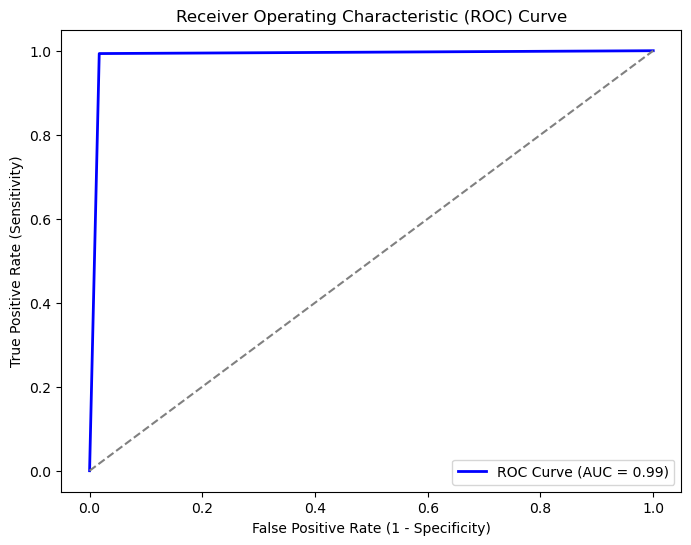

In [24]:
# Plot ROC Curve for Classification

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_class)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line

plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


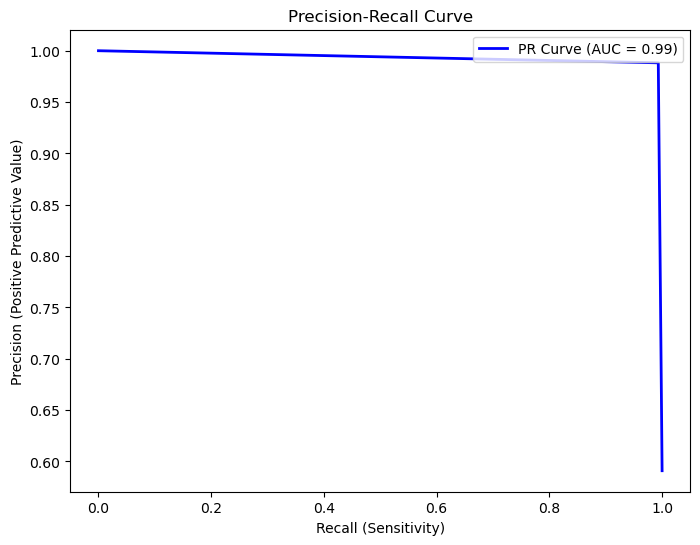

In [25]:
# Plot Precision-Recall (PR) Curve

from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve and AUC score
precision, recall, thresholds = precision_recall_curve(y_test_class, y_pred_class)
pr_auc = average_precision_score(y_test_class, y_pred_class)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel("Recall (Sensitivity)")
plt.ylabel("Precision (Positive Predictive Value)")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()


In [26]:
# Generate a Classification Report

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test_class, y_pred_class, target_names=["Normal (0)", "Abnormal (1)"])
print(report)


              precision    recall  f1-score   support

  Normal (0)       0.99      0.98      0.99       409
Abnormal (1)       0.99      0.99      0.99       591

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [3]:
import tensorflow as tf
model = tf.keras.Sequential

In [14]:
import tensorflow as tf

# Create a Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Meghana K\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.save('D:/anveshana/ecg_model.h5')

In [16]:
import tensorflow as tf

# Load your trained .h5 model
model = tf.keras.models.load_model('D:/anveshana/ecg_model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # Or use from_saved_model() if it's a saved model

# (Optional) Apply optimizations like quantization to reduce model size
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model to TFLite format
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('D:/anveshana/ecg_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model has been converted to TFLite format and saved successfully!")

INFO:tensorflow:Assets written to: C:\Users\MEGHAN~1\AppData\Local\Temp\tmppi13ww08\assets


INFO:tensorflow:Assets written to: C:\Users\MEGHAN~1\AppData\Local\Temp\tmppi13ww08\assets


Saved artifact at 'C:\Users\MEGHAN~1\AppData\Local\Temp\tmppi13ww08'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2227445565968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2227445573264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2227445572688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2227445574224: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model has been converted to TFLite format and saved successfully!
